In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
df = pd.read_csv(file)
df.sample(10)
df = df.drop(['Poster_Link', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4', 'Director'], axis=1)
# dropping these 2 won't make a big difference on the score but it will make the code simpler

In [39]:
df.sample(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
695,The Day of the Jackal,1973,A,143 min,"Crime, Drama, Thriller",7.8,80.0,37445,"16,056,255"
385,The Straight Story,1999,U,112 min,"Biography, Drama",8.0,86.0,82002,"6,203,044"
139,Bhaag Milkha Bhaag,2013,U,186 min,"Biography, Drama, Sport",8.2,NaN,61137,"1,626,289"
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,30144,"696,690"
333,Wonder,2017,U,113 min,"Drama, Family",8.0,66.0,141923,"132,422,809"
804,Abre los ojos,1997,U,119 min,"Drama, Mystery, Sci-Fi",7.7,NaN,64082,"368,234"
128,Chhichhore,2019,UA,143 min,"Comedy, Drama",8.2,NaN,33893,"898,575"
324,Airlift,2016,UA,130 min,"Drama, History",8.0,NaN,52897,NaN
45,Nuovo Cinema Paradiso,1988,U,155 min,"Drama, Romance",8.5,80.0,230763,"11,990,401"
188,Tôkyô monogatari,1953,U,136 min,Drama,8.2,NaN,53153,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


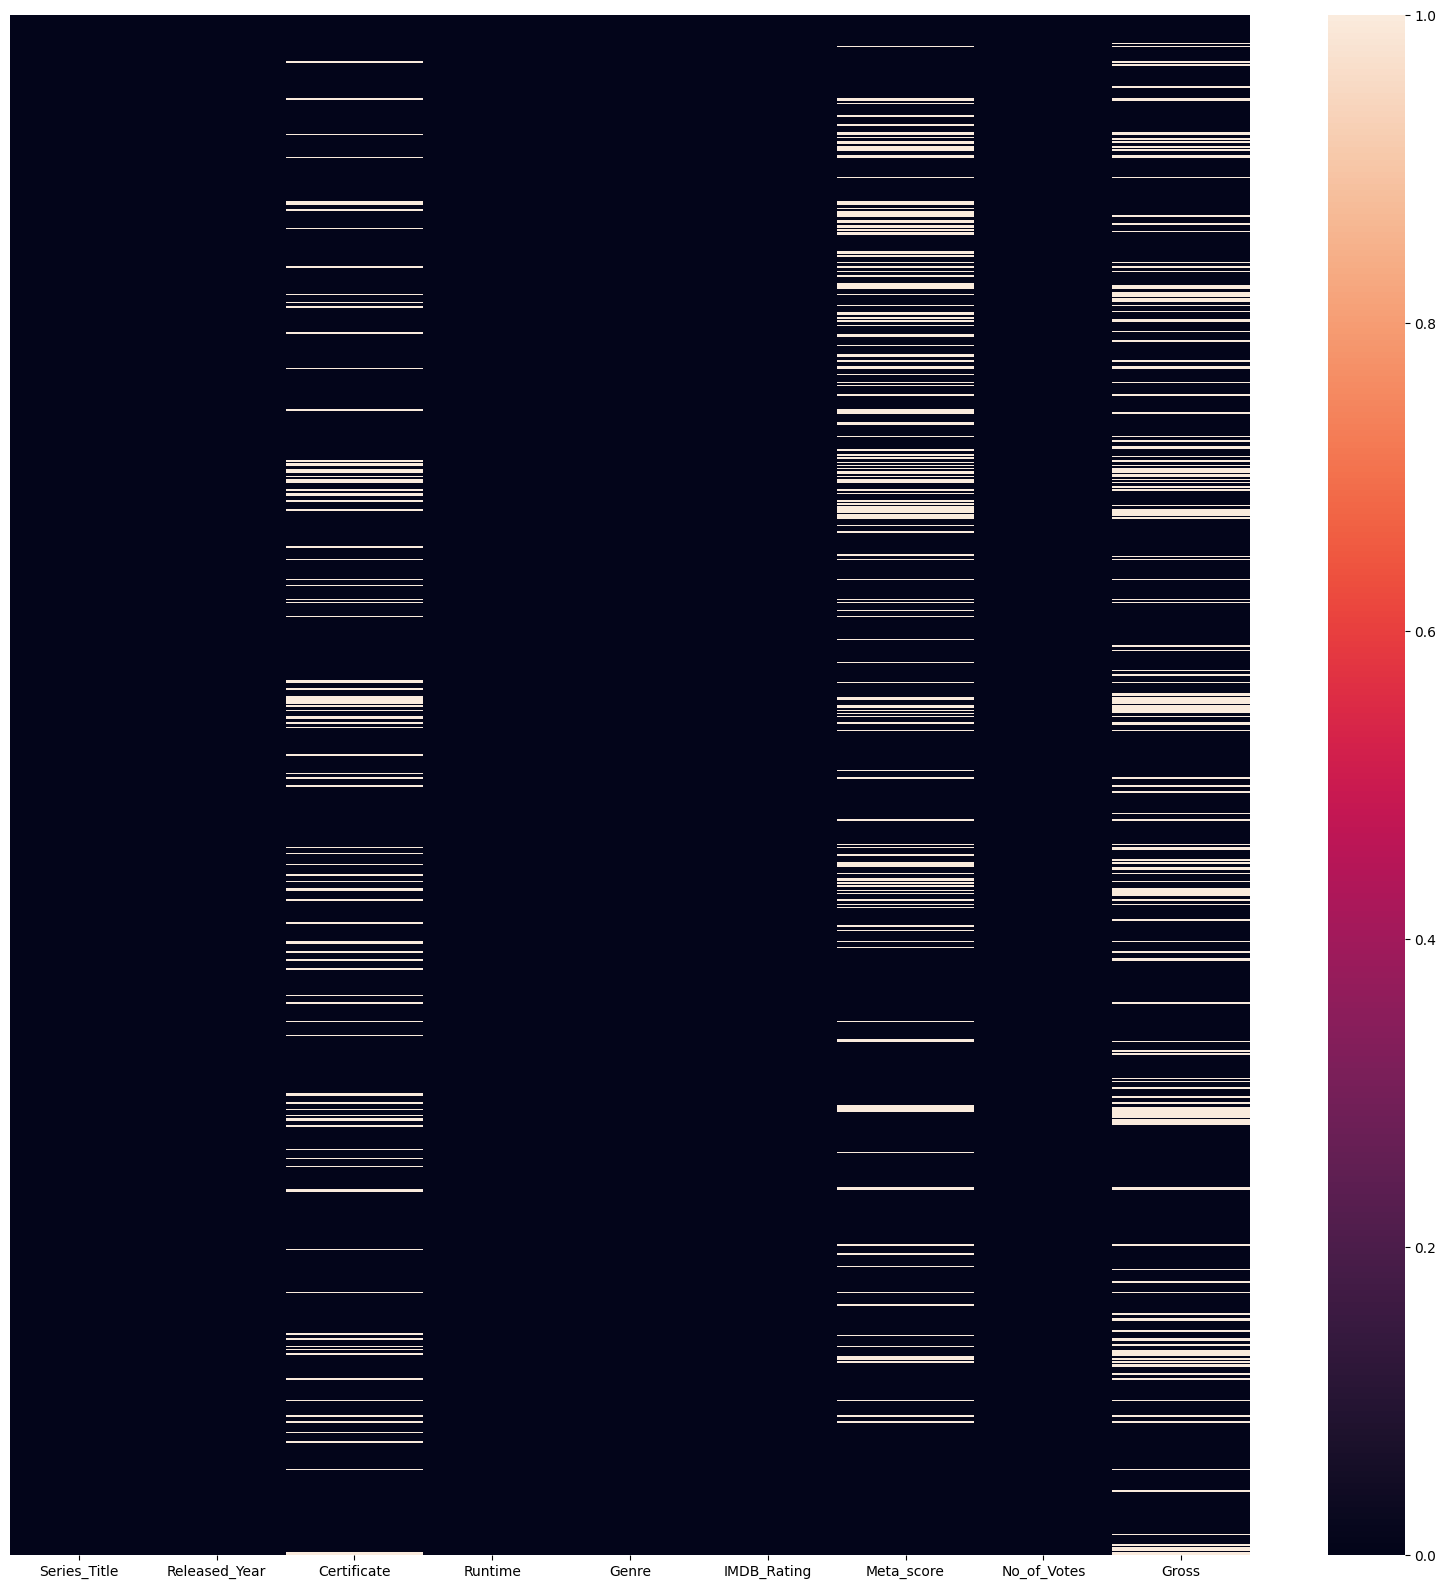

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), yticklabels = False)
plt.show()

In [42]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
No_of_Votes        0
Gross            169
dtype: int64

In [43]:
df.shape
#the values for which the gross is missing should be deleted 

(1000, 9)

In [44]:
df = df.dropna(subset = ['Gross'])

In [45]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,30144,"696,690"
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,50.0,45338,"1,378,435"
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,65.0,166409,"141,843,612"
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,96.0,40351,"13,780,024"


In [46]:
df.isnull().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score       81
No_of_Votes       0
Gross             0
dtype: int64

In [47]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,831.000000,750.000000,8.310000e+02
mean,7.946931,77.460000,3.152499e+05
std,0.283204,12.493967,3.436443e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,7.143000e+04
50%,7.900000,78.000000,1.867340e+05
75%,8.100000,86.000000,4.457210e+05
max,9.300000,100.000000,2.343110e+06


In [48]:
most_frequent_value = df['Certificate'].mode()[0]
df['Certificate'].fillna(most_frequent_value, inplace=True)
mean_value = df['Meta_score'].mean()
df['Meta_score'].fillna(mean_value, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    object 
 2   Certificate    831 non-null    object 
 3   Runtime        831 non-null    object 
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Meta_score     831 non-null    float64
 7   No_of_Votes    831 non-null    int64  
 8   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 64.9+ KB


In [50]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [51]:
# df['Released_Year'] = df['Released_Year'].astype(int)

In [52]:
problematic_rows = df[df['Released_Year'] == 'PG']

In [53]:
problematic_rows

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,269197,173837933.0


In [54]:
df.drop(index=966, inplace=True, errors='ignore')

In [55]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [56]:
# Extract the numeric part and convert it to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 997
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   830 non-null    object 
 1   Released_Year  830 non-null    int64  
 2   Certificate    830 non-null    object 
 3   Runtime        830 non-null    int64  
 4   Genre          830 non-null    object 
 5   IMDB_Rating    830 non-null    float64
 6   Meta_score     830 non-null    float64
 7   No_of_Votes    830 non-null    int64  
 8   Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 64.8+ KB


In [58]:
df['Genre'].value_counts()

Genre
Drama                        75
Drama, Romance               31
Comedy, Drama                29
Comedy, Drama, Romance       26
Crime, Drama, Thriller       25
                             ..
Drama, History                1
Film-Noir, Mystery            1
Drama, Film-Noir, Mystery     1
Adventure, Thriller           1
Adventure, Comedy, War        1
Name: count, Length: 182, dtype: int64

In [59]:
genres_split = df['Genre'].str.get_dummies(', ')
df = pd.concat([df, genres_split], axis=1)
df = df.drop('Genre', axis=1)
df.sample(5)

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
389,The Iron Giant,1999,PG,86,8.0,85.0,172083,23159305.0,1,1,...,0,0,0,0,0,0,0,0,0,0
602,Ang-ma-reul bo-at-da,2010,U,144,7.8,67.0,111252,128392.0,1,0,...,0,0,0,0,0,0,0,0,0,0
506,Harry Potter and the Prisoner of Azkaban,2004,U,142,7.9,82.0,552493,249358727.0,0,1,...,0,0,0,0,0,0,0,0,0,0
499,Fantastic Mr. Fox,2009,PG,87,7.9,83.0,199696,21002919.0,0,1,...,0,0,0,0,0,0,0,0,0,0
250,The Truman Show,1998,U,103,8.1,90.0,939631,125618201.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df['Certificate'].value_counts()

Certificate
U           245
A           180
UA          163
R           135
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
Unrated       1
TV-PG         1
U/A           1
Name: count, dtype: int64

In [61]:
value_counts = df['Certificate'].value_counts()
less_frequent_values = value_counts[value_counts <= 9].index

# Replace less frequent values with 'Other'
df['Certificate'] = df['Certificate'].apply(lambda x: 'Other' if x in less_frequent_values else x)

In [62]:
df['Certificate'].value_counts()

Certificate
U         245
A         180
UA        163
R         135
PG-13      39
PG         24
Passed     23
Other      11
G          10
Name: count, dtype: int64

In [63]:
df = df.drop('Series_Title', axis=1)

In [64]:
df.sample(5)

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
893,2015,A,121,7.6,82.0,371291,46889293.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24,1998,R,169,8.6,91.0,1235804,216540909.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
700,1967,U,108,7.8,81.0,27733,17550741.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
747,2015,U,137,7.7,79.0,73964,83861.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
293,1962,Passed,134,8.1,75.0,50058,4050000.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [65]:
one_hot_encoded = pd.get_dummies(df['Certificate'], prefix='Certificate')

# Concatenate the one-hot encoded columns with the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Reshape the DataFrame
reshaped_df = df_encoded.drop('Certificate', axis=1)
df.sample(5)
reshaped_df.sample(5)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,...,Western,Certificate_A,Certificate_G,Certificate_Other,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
93,2009,153,8.3,69.00,1267869,120540719.0,0,1,0,0,...,0,True,False,False,False,False,False,False,False,False
239,2003,131,8.1,82.00,139558,14131.0,0,0,0,0,...,0,False,False,False,False,False,False,False,False,True
654,1997,106,7.8,64.00,280845,12339633.0,0,0,0,0,...,0,False,False,False,False,False,False,False,False,True
136,2015,163,8.2,77.46,70367,739478.0,0,0,0,0,...,0,False,False,False,False,False,False,False,False,True
66,2008,98,8.4,95.00,999790,223808164.0,0,1,1,0,...,0,False,False,False,False,False,False,False,True,False


In [66]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [67]:
df['Gross'] = df['Gross'].astype(int)

In [68]:
df = reshaped_df
X = df.drop('Gross', axis=1)
y = df['Gross']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
df.isnull().sum()

Released_Year         0
Runtime               0
IMDB_Rating           0
Meta_score            0
No_of_Votes           0
Gross                 0
Action                0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
Film-Noir             0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Certificate_A         0
Certificate_G         0
Certificate_Other     0
Certificate_PG        0
Certificate_PG-13     0
Certificate_Passed    0
Certificate_R         0
Certificate_U         0
Certificate_UA        0
dtype: int64

In [71]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.570771740376475

In [77]:
df.describe()
#but we should improve the r2_score bec it should be close to 1

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
count,830.000000,830.000000,830.000000,830.000000,8.300000e+02,8.300000e+02,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,1993.918072,124.059036,7.947349,77.460554,3.153053e+05,6.790728e+07,0.187952,0.203614,0.080723,0.115663,...,0.026506,0.039759,0.016867,0.101205,0.128916,0.073494,0.022892,0.132530,0.044578,0.019277
std,21.147778,27.512473,0.283118,11.875819,3.438478e+05,1.097546e+08,0.390909,0.402928,0.272573,0.320013,...,0.160731,0.195510,0.128852,0.301782,0.335309,0.261103,0.149648,0.339271,0.206501,0.137580
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,104.000000,7.700000,71.000000,7.140450e+04,3.245338e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,120.000000,7.900000,77.460000,1.858500e+05,2.345744e+07,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,138.000000,8.100000,85.750000,4.465445e+05,8.010324e+07,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df.sample(5)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,...,Western,Certificate_A,Certificate_G,Certificate_Other,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
556,1951,101,7.9,88.00,123341,7630000.0,0,0,0,0,...,0,True,False,False,False,False,False,False,False,False
565,1935,96,7.9,77.46,30580,2537520.0,0,0,0,0,...,0,False,False,False,False,False,True,False,False,False
987,1978,121,7.6,59.00,73662,35000000.0,0,0,0,1,...,0,True,False,False,False,False,False,False,False,False
886,2015,97,7.6,83.00,35785,845464.0,0,0,0,0,...,0,False,False,False,False,True,False,False,False,False
579,2016,184,7.8,77.46,40416,1782795.0,0,0,0,1,...,0,False,False,False,False,False,False,False,True,False


In [80]:
df = df.astype(int)

In [82]:
df.sample(5)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,...,Western,Certificate_A,Certificate_G,Certificate_Other,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
72,1981,115,8,85,884112,248159971,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
603,2011,158,7,71,423010,102515793,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
727,2014,86,7,76,157498,3333000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
935,2003,93,7,45,67360,548707,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
698,1971,100,7,67,178731,4000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
df.sample(5)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,...,Western,Certificate_A,Certificate_G,Certificate_Other,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
473,2017,130,7,74,587775,315058289,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
487,2008,114,7,82,205609,2122065,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
169,1988,142,8,77,26402,280015,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
643,2001,99,7,83,60684,2892011,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
624,2009,141,7,63,216421,3600,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
X_train

array([[ 0.2253087 , -0.8439733 , -0.52477366, ...,  2.30733819,
        -0.65653216, -0.49576064],
       [ 0.03557506, -0.99076088, -0.8817918 , ..., -0.43339984,
         1.52315462, -0.49576064],
       [-0.96052656, -0.66048883,  0.18926263, ..., -0.43339984,
        -0.65653216, -0.49576064],
       ...,
       [ 1.17397691,  1.10096209,  0.18926263, ..., -0.43339984,
        -0.65653216,  2.01710245],
       [-0.43875905,  0.29363042, -0.16775551, ..., -0.43339984,
         1.52315462, -0.49576064],
       [-1.67202772,  0.440418  ,  1.26031706, ..., -0.43339984,
         1.52315462, -0.49576064]])

In [89]:
regressor2 = XGBRegressor()
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
r2_score(y_pred, y_test)
#how did the r2_score decrease??????????

0.39499554319163954